# <center>2v2 'Men's Net' 'Flight Path' League Analysisfor the 2018 Season</center>
## <center>by Jason Leduc and Brian Hammer</center>

# I. The Scoring System

In this notebook, I am attempting to recreate my volleyball league scoring spreadsheet using Python and the pandas package.  We have been running this league for three years now, so we have 3 seasons of data: 2016, 2017, and 2018.  Here I will work with data from 2018.  The original spreadsheet is here: https://docs.google.com/spreadsheets/d/1Rmo0pIkvgpZ_oLMLvJklT0JSh8bdgfC0M709-y5EJ_8/edit?usp=sharing

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
vb_2018 = pd.read_csv('../data/vb_2018.csv', sep = ';')
# must save the csv as a csv using the drop-down filetype menu in OpenOffice Calc

In [4]:
vb_2018.head()

,Date,Winner,Winner.1,margin,Loser,Loser.1,court
0,05/02/18,NaN,NaN,NaN,NaN,NaN,1.0
1,05/02/18,NaN,NaN,NaN,NaN,NaN,1.0
2,05/02/18,Kevin,Peter,13.0,Hammer,Jason,1.0
3,05/02/18,Brent,Jeremy,6.0,Kevin,Peter,1.0
4,05/02/18,Brent,Jeremy,6.0,Andy,Juan,1.0


In [5]:
vb_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 7 columns):
Date        378 non-null object
Winner      223 non-null object
Winner.1    223 non-null object
margin      223 non-null float64
Loser       223 non-null object
Loser.1     223 non-null object
court       536 non-null float64
dtypes: float64(2), object(5)
memory usage: 29.4+ KB


First I want to change the names of the columns

In [6]:
vb_2018.rename(columns={'Winner': 'Winner1', 'Winner.1': 'Winner2', 'Loser':'Loser1', 
                                 'Loser.1': 'Loser2'}, inplace=True)

In [7]:
vb_2018.head()

,Date,Winner1,Winner2,margin,Loser1,Loser2,court
0,05/02/18,NaN,NaN,NaN,NaN,NaN,1.0
1,05/02/18,NaN,NaN,NaN,NaN,NaN,1.0
2,05/02/18,Kevin,Peter,13.0,Hammer,Jason,1.0
3,05/02/18,Brent,Jeremy,6.0,Kevin,Peter,1.0
4,05/02/18,Brent,Jeremy,6.0,Andy,Juan,1.0


Removing rows with NaN in "Winner1" column, and saving results with new df name

In [8]:
vb18 = vb_2018[vb_2018.Winner1.notnull()].copy(deep=True)
vb18.head()

,Date,Winner1,Winner2,margin,Loser1,Loser2,court
2,05/02/18,Kevin,Peter,13.0,Hammer,Jason,1.0
3,05/02/18,Brent,Jeremy,6.0,Kevin,Peter,1.0
4,05/02/18,Brent,Jeremy,6.0,Andy,Juan,1.0
19,05/09/18,Andy,Casey,11.0,Jason,Peter,1.0
20,05/09/18,Jeremy,Nick,5.0,Andy,Casey,1.0


Changing datatypes of margin and court to int

In [9]:
vb18['margin'] = vb18['margin'].astype(int)
vb18['court'] = vb18['court'].astype(int)
vb18.head()

,Date,Winner1,Winner2,margin,Loser1,Loser2,court
2,05/02/18,Kevin,Peter,13,Hammer,Jason,1
3,05/02/18,Brent,Jeremy,6,Kevin,Peter,1
4,05/02/18,Brent,Jeremy,6,Andy,Juan,1
19,05/09/18,Andy,Casey,11,Jason,Peter,1
20,05/09/18,Jeremy,Nick,5,Andy,Casey,1


I think I want a list of all the players, so I can give them scores

In [10]:
player_list = sorted(pd.unique(vb18[['Winner1', 'Winner2', 'Loser1', 'Loser2']].values.ravel('K')))
player_list

['Abrah',
 'Andy',
 'BA',
 'Brent',
 'Casey',
 'Eric',
 'Hammer',
 'Jason',
 'Jeremy',
 'Jerry',
 'Juan',
 'Kevin',
 'Martin',
 'Nick',
 'Peter',
 'Scott']

In the spreadsheet form of this, I had a grid with all the names across both the rows and columns to record the point totals for each possible pair of teammates

In [11]:
court1_grid = pd.DataFrame(index=player_list, columns=player_list)
court1_grid

,Abrah,Andy,BA,Brent,Casey,Eric,Hammer,Jason,Jeremy,Jerry,Juan,Kevin,Martin,Nick,Peter,Scott
Abrah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Casey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hammer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jason,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jeremy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jerry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I only need to fill in half of the grid, which I did in a sloppy manual way in the spreadsheet.  In each row of the data, the winners and losers are listed alphabetically, so I can use this to require that row names are alphabetically prior to column names

The grid may not be necessary in the short term for calculations, although it is still likely a useful visualization.  For later analysis of relative team strengths, I will need to treat each combination of teammates as an object, specifically a node in a graph, so I may as well establish that data structure now for scoring.  First I'll make a list of the possible teammate combinations

In [12]:
all_team_combos = list()
for name in player_list:
    for name2 in player_list:
        new_team = sorted([name, name2])
        if new_team[0] == new_team[1]: # can't have a team with two of the same player
            continue
        if new_team in all_team_combos: # don't want repeated team combos
            continue
        else:
            all_team_combos.append(new_team)
print(all_team_combos)

[['Abrah', 'Andy'], ['Abrah', 'BA'], ['Abrah', 'Brent'], ['Abrah', 'Casey'], ['Abrah', 'Eric'], ['Abrah', 'Hammer'], ['Abrah', 'Jason'], ['Abrah', 'Jeremy'], ['Abrah', 'Jerry'], ['Abrah', 'Juan'], ['Abrah', 'Kevin'], ['Abrah', 'Martin'], ['Abrah', 'Nick'], ['Abrah', 'Peter'], ['Abrah', 'Scott'], ['Andy', 'BA'], ['Andy', 'Brent'], ['Andy', 'Casey'], ['Andy', 'Eric'], ['Andy', 'Hammer'], ['Andy', 'Jason'], ['Andy', 'Jeremy'], ['Andy', 'Jerry'], ['Andy', 'Juan'], ['Andy', 'Kevin'], ['Andy', 'Martin'], ['Andy', 'Nick'], ['Andy', 'Peter'], ['Andy', 'Scott'], ['BA', 'Brent'], ['BA', 'Casey'], ['BA', 'Eric'], ['BA', 'Hammer'], ['BA', 'Jason'], ['BA', 'Jeremy'], ['BA', 'Jerry'], ['BA', 'Juan'], ['BA', 'Kevin'], ['BA', 'Martin'], ['BA', 'Nick'], ['BA', 'Peter'], ['BA', 'Scott'], ['Brent', 'Casey'], ['Brent', 'Eric'], ['Brent', 'Hammer'], ['Brent', 'Jason'], ['Brent', 'Jeremy'], ['Brent', 'Jerry'], ['Brent', 'Juan'], ['Brent', 'Kevin'], ['Brent', 'Martin'], ['Brent', 'Nick'], ['Brent', 'Peter'],

I want to make a dictionary of all these teams, using a "Name1/Name2" string as the key, and a dictionary of information as the value.  This would include the 2-item list of players, the court1 and court 2 point totals, and a list of games played by that team.  For deeper analysis, we will also likely extract a total spread vs each other team, with a positive spread resulting in a directed edge from the other team, and a negative spread resulting in a directed edge toward the other team

The scoring system involves giving 8 points for a court 1 win with a new partner, 4 more points for a 2nd win with that partner, 2 more for a 3rd win, and one point for every win after that with the same partner.  In addition, one point is awarded for each win on court 2.  To implement the scoring system here, I'll count the court 1 wins of each team and use that number as an index into the scoring_system list.

In [13]:
team_dict = dict() # store data for each possible team
individual_scores = dict() # keep track of individual scores
team_names = [] # I need this list later in part II (Team Power Rankings) to build a player stats dictionary
for player in player_list:
    individual_scores[player] = 0
scoring_system = [0, 8, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
for team in all_team_combos:
    court1_wins = 0
    court2_wins = 0
    team_name = str(team[0] + "/" + team[1])
    team_names.append(team_name)
    # get a list of games, with each game a dictionary automatically generated from the row data in the for statement
    # need to iterate through the dataframe of games
    game_list = list()
    for index, row in vb18.iterrows():
        if list([row['Winner1'], row['Winner2']]) == team:
            game_list.append(row)
            if(row['court'] == 1):
                court1_wins += 1
            else:
                court2_wins += 1
    court1_points = scoring_system[court1_wins]
    individual_scores[team[0]] += court1_points + court2_wins
    individual_scores[team[1]] += court1_points + court2_wins
    team_dict[team_name] = [team, court1_points, court2_wins, game_list]
    court1_grid[team[0]][team[1]] = court1_points
print("Individual scores: " + str(individual_scores))

Individual scores: {'Abrah': 21, 'Andy': 103, 'BA': 111, 'Brent': 32, 'Casey': 125, 'Eric': 10, 'Hammer': 74, 'Jason': 74, 'Jeremy': 184, 'Jerry': 78, 'Juan': 81, 'Kevin': 156, 'Martin': 89, 'Nick': 64, 'Peter': 58, 'Scott': 38}


In [14]:
team_dict

{'Abrah/Andy': [['Abrah', 'Andy'], 0, 0, []],
 'Abrah/BA': [['Abrah', 'BA'], 0, 1, [Date       07/25/18
   Winner1       Abrah
   Winner2          BA
   margin            2
   Loser1       Hammer
   Loser2        Peter
   court             2
   Name: 476, dtype: object]],
 'Abrah/Brent': [['Abrah', 'Brent'], 0, 1, [Date       06/13/18
   Winner1       Abrah
   Winner2       Brent
   margin            6
   Loser1         Andy
   Loser2        Jerry
   court             2
   Name: 378, dtype: object]],
 'Abrah/Casey': [['Abrah', 'Casey'], 0, 1, [Date       06/20/18
   Winner1       Abrah
   Winner2       Casey
   margin            4
   Loser1         Juan
   Loser2        Scott
   court             2
   Name: 390, dtype: object]],
 'Abrah/Eric': [['Abrah', 'Eric'], 0, 0, []],
 'Abrah/Hammer': [['Abrah', 'Hammer'], 0, 0, []],
 'Abrah/Jason': [['Abrah', 'Jason'], 0, 0, []],
 'Abrah/Jeremy': [['Abrah', 'Jeremy'], 14, 2, [Date       06/27/18
   Winner1       Abrah
   Winner2      Jeremy
   m

In [15]:
court1_grid

,Abrah,Andy,BA,Brent,Casey,Eric,Hammer,Jason,Jeremy,Jerry,Juan,Kevin,Martin,Nick,Peter,Scott
Abrah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andy,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BA,0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brent,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Casey,0,14,12,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eric,0,8,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hammer,0,12,8,0,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jason,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jeremy,14,14,14,12,14,0,14,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jerry,0,0,8,0,0,0,0,8,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# II. Team Power Rankings 

In the Google Sheets implementation of the league, I did an analysis of team strengths in August 2018.  I started by calculating an average point spread per game for each player to establish a player strength statistic. These were used to establish a sort of prior belief about the strength of each team.  Then point spread data were collected from actual matchups, and an adjustment was made to the team strength measure based on the difference in the actual outcomes vs. the predicted outcomes. These differences were added to the prior belief to establish a Power Rating for each team.  The data were presented in a grid much like the one above, so that playoff captains would have some guidance on choosing their partners.  I will recreate that analysis here before moving on to other methods such as Hammer's idea for a graph theoretic approach to the problem.

First I'll build a dictionary of player stats to store my new average spread statistic, in addition to point totals, and average points.  To get these averages, I'll need a count of games played

In [16]:
player_stats = dict()
for player in player_list:
    player_stats[player] = dict()
print(player_stats)

{'Abrah': {}, 'Andy': {}, 'BA': {}, 'Brent': {}, 'Casey': {}, 'Eric': {}, 'Hammer': {}, 'Jason': {}, 'Jeremy': {}, 'Jerry': {}, 'Juan': {}, 'Kevin': {}, 'Martin': {}, 'Nick': {}, 'Peter': {}, 'Scott': {}}


In [17]:
for player in individual_scores:
    player_stats[player]['total_points'] = individual_scores[player]
    player_stats[player]['games_played'] = 0   #initializing, will count below]
    player_stats[player]['spread'] = 0
print(player_stats)

{'Abrah': {'total_points': 21, 'games_played': 0, 'spread': 0}, 'Andy': {'total_points': 103, 'games_played': 0, 'spread': 0}, 'BA': {'total_points': 111, 'games_played': 0, 'spread': 0}, 'Brent': {'total_points': 32, 'games_played': 0, 'spread': 0}, 'Casey': {'total_points': 125, 'games_played': 0, 'spread': 0}, 'Eric': {'total_points': 10, 'games_played': 0, 'spread': 0}, 'Hammer': {'total_points': 74, 'games_played': 0, 'spread': 0}, 'Jason': {'total_points': 74, 'games_played': 0, 'spread': 0}, 'Jeremy': {'total_points': 184, 'games_played': 0, 'spread': 0}, 'Jerry': {'total_points': 78, 'games_played': 0, 'spread': 0}, 'Juan': {'total_points': 81, 'games_played': 0, 'spread': 0}, 'Kevin': {'total_points': 156, 'games_played': 0, 'spread': 0}, 'Martin': {'total_points': 89, 'games_played': 0, 'spread': 0}, 'Nick': {'total_points': 64, 'games_played': 0, 'spread': 0}, 'Peter': {'total_points': 58, 'games_played': 0, 'spread': 0}, 'Scott': {'total_points': 38, 'games_played': 0, 'spr

Going to try counting games directly from the vb18 dataframe while computing cumulative spreads

In [18]:
# print(team_names)
for index, row in vb18.iterrows():
    player_stats[row['Winner1']]['games_played'] += 1
    player_stats[row['Winner2']]['games_played'] += 1
    player_stats[row['Loser1']]['games_played'] += 1
    player_stats[row['Loser2']]['games_played'] += 1
    player_stats[row['Winner1']]['spread'] += row['margin']
    player_stats[row['Winner2']]['spread'] += row['margin']
    player_stats[row['Loser1']]['spread'] -= row['margin']
    player_stats[row['Loser2']]['spread'] -= row['margin']
print(player_stats)

{'Abrah': {'total_points': 21, 'games_played': 52, 'spread': -205}, 'Andy': {'total_points': 103, 'games_played': 64, 'spread': 105}, 'BA': {'total_points': 111, 'games_played': 58, 'spread': 14}, 'Brent': {'total_points': 32, 'games_played': 43, 'spread': -89}, 'Casey': {'total_points': 125, 'games_played': 59, 'spread': 112}, 'Eric': {'total_points': 10, 'games_played': 8, 'spread': 1}, 'Hammer': {'total_points': 74, 'games_played': 64, 'spread': -83}, 'Jason': {'total_points': 74, 'games_played': 71, 'spread': -55}, 'Jeremy': {'total_points': 184, 'games_played': 61, 'spread': 223}, 'Jerry': {'total_points': 78, 'games_played': 60, 'spread': 43}, 'Juan': {'total_points': 81, 'games_played': 44, 'spread': 60}, 'Kevin': {'total_points': 156, 'games_played': 56, 'spread': 157}, 'Martin': {'total_points': 89, 'games_played': 69, 'spread': -31}, 'Nick': {'total_points': 64, 'games_played': 50, 'spread': -36}, 'Peter': {'total_points': 58, 'games_played': 72, 'spread': -96}, 'Scott': {'to

Let's compute the average spread, which will be used to compute prior expectations for the outcomes of games

In [19]:
for player in player_stats:
    player_stats[player]['average_spread'] = player_stats[player]['spread'] / player_stats[player]['games_played']
player_stats

{'Abrah': {'average_spread': -3.9423076923076925,
  'games_played': 52,
  'spread': -205,
  'total_points': 21},
 'Andy': {'average_spread': 1.640625,
  'games_played': 64,
  'spread': 105,
  'total_points': 103},
 'BA': {'average_spread': 0.2413793103448276,
  'games_played': 58,
  'spread': 14,
  'total_points': 111},
 'Brent': {'average_spread': -2.0697674418604652,
  'games_played': 43,
  'spread': -89,
  'total_points': 32},
 'Casey': {'average_spread': 1.8983050847457628,
  'games_played': 59,
  'spread': 112,
  'total_points': 125},
 'Eric': {'average_spread': 0.125,
  'games_played': 8,
  'spread': 1,
  'total_points': 10},
 'Hammer': {'average_spread': -1.296875,
  'games_played': 64,
  'spread': -83,
  'total_points': 74},
 'Jason': {'average_spread': -0.7746478873239436,
  'games_played': 71,
  'spread': -55,
  'total_points': 74},
 'Jeremy': {'average_spread': 3.6557377049180326,
  'games_played': 61,
  'spread': 223,
  'total_points': 184},
 'Jerry': {'average_spread': 0.7

Now let's use these average spreads to predict the outcome of games that were already played.  We'll enter these predictions in a new column in the vb18 dataframe, and we'll subtract these predicted spreads from the actual margin of victory to calculate a deviation_from_prediction

In [20]:
predicted_spreads = []
for index, row in vb18.iterrows():
    predicted_spreads.append(player_stats[row['Winner1']]['average_spread'] +
                            player_stats[row['Winner2']]['average_spread'] -
                            player_stats[row['Loser1']]['average_spread'] -
                             player_stats[row['Loser2']]['average_spread'])
vb18['predicted_spreads'] = predicted_spreads
vb18['deviaton_from_prediction'] = vb18['margin'] - vb18['predicted_spreads']
vb18.head()

,Date,Winner1,Winner2,margin,Loser1,Loser2,court,predicted_spreads,deviaton_from_prediction
2,05/02/18,Kevin,Peter,13,Hammer,Jason,1,3.541761,9.458239
3,05/02/18,Brent,Jeremy,6,Kevin,Peter,1,0.115732,5.884268
4,05/02/18,Brent,Jeremy,6,Andy,Juan,1,-1.418291,7.418291
19,05/09/18,Andy,Casey,11,Jason,Peter,1,5.646911,5.353089
20,05/09/18,Jeremy,Nick,5,Andy,Casey,1,-0.603192,5.603192


<br>
# III. Network analysis of the league using graphs in NetworkX

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

Let's generate a generic graph of the team matchups first, with edges representing a simple matchup.  Within the edge data, I'll store a "margin" which will be the sum of the margins of victory for matchups involving those teams.

In [22]:
G = nx.Graph()
for team in all_team_combos:
    team_name = str(team[0] + "/" + team[1])
    G.add_node(team_name)
    
for key, value in team_dict.items():
    for game in value[3]:
        winning_team = game['Winner1'] + "/" + game['Winner2']
        losing_team = game["Loser1"] + '/' + game['Loser2']
        teams = [winning_team, losing_team]
        sorted_teams = sorted(teams)
        if(teams != sorted_teams): # adjust margin of victory to match team order produced by sorting
            margin = -(game['margin'])
        else:
            margin = game['margin']
        print(str(sorted_teams) + str(margin))
        if G.has_edge(sorted_teams[0], sorted_teams[1]): # add margins of victory for multiple matchups of the same team
            G[sorted_teams[0]][sorted_teams[1]]['margin'] += margin
        else:
            G.add_edge(sorted_teams[0], sorted_teams[1], margin=margin)

['Abrah/BA', 'Hammer/Peter']2
['Abrah/Brent', 'Andy/Jerry']6
['Abrah/Casey', 'Juan/Scott']4
['Abrah/Jeremy', 'Jason/Peter']7
['Abrah/Jeremy', 'Hammer/Kevin']4
['Abrah/Jeremy', 'Casey/Martin']2
['Abrah/Jeremy', 'Andy/Martin']7
['Abrah/Jeremy', 'BA/Peter']2
['Abrah/Jerry', 'Hammer/Jason']2
['Abrah/Nick', 'Peter/Scott']4
['Andy/BA', 'Casey/Juan']7
['Andy/BA', 'Jeremy/Peter']6
['Abrah/Kevin', 'Andy/Brent']-6
['Andy/Brent', 'Nick/Scott']2
['Andy/Casey', 'Jason/Peter']11
['Andy/Casey', 'Jeremy/Nick']2
['Andy/Casey', 'BA/Jason']3
['Andy/Casey', 'Brent/Martin']11
['Andy/Casey', 'BA/Juan']2
['Andy/Eric', 'Hammer/Jason']7
['Andy/Eric', 'Brent/Kevin']6
['Andy/Hammer', 'BA/Jerry']7
['Andy/Hammer', 'Casey/Martin']10
['Andy/Hammer', 'Brent/Peter']6
['Andy/Hammer', 'Jason/Kevin']9
['Andy/Jason', 'Martin/Peter']6
['Andy/Jason', 'Kevin/Scott']9
['Andy/Jeremy', 'Brent/Peter']2
['Abrah/Casey', 'Andy/Jeremy']-2
['Andy/Jeremy', 'Jason/Nick']5
['Andy/Jeremy', 'Martin/Peter']8
['Abrah/Martin', 'Andy/Jeremy']

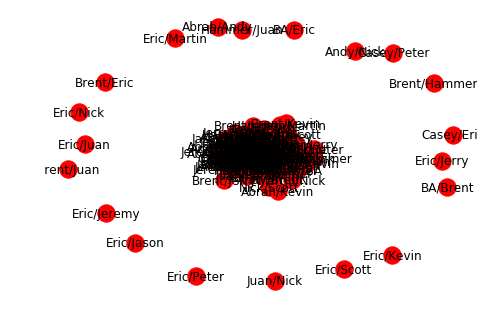

In [23]:
nx.draw(G, with_labels = True)
plt.show()

Trying to determine which nodes have no edges, but the edge data are apparently only in the edges themselves. So I'm using the presence of a team_name in an edge to add an item to the team_dict entry for that team_name, specifically the word "game".  Then I'll use the size of the items list to determine which team_names were not involved in edges, make a list of those, then iterate through the list removing the corresponding nodes

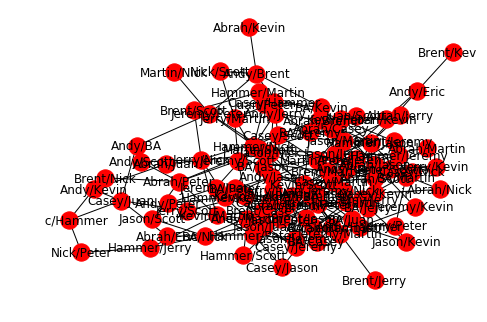

In [24]:
for edge in G.edges():
    team_dict[edge[0]].append('game')
    team_dict[edge[1]].append('game')

# removing nodes with no edges (e.g. all of Eric's nodes)
nodes_to_remove = []
for node in G.nodes():  # can't do the removal in here because it changes the iterated object
    if len(team_dict[node]) < 5:
        nodes_to_remove.append(node)   # make a list of unconnected nodes to remove     
for node in nodes_to_remove:
    G.remove_node(node)

nx.draw(G, with_labels = True)
plt.show()

Next I want to create a DIRECTED graph using the structure of the graph G above, but using the 'margin' data in the edges to determine the direction